# QuarentenaDados - Alura

### Aula 3 - Analisando dados de filmes. Dataset obtido em: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset

In [2]:
#Importando a base
import pandas as pd
import numpy as np

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

imdb = pd.read_csv(r"C:\Users\LemosM02\Desktop\Estudos\Quarentenadados\IMDB 5000\movie_metadata.csv", encoding='latin1')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,SpectreÂ,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight RisesÂ,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force AwakensÂ ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Analisando a coluna color
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [5]:
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [6]:
#Normalize = True nos traz a %
imdb["color"].value_counts(normalize=True)

Color              0.96
 Black and White   0.04
Name: color, dtype: float64

In [7]:
#Analisando outras informações da base
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Gene Teigland        1
Ashish R. Mohan      1
Vicky Jewson         1
Jonathan Parker      1
Robinson Devor       1
Name: director_name, Length: 2398, dtype: int64

In [8]:
imdb["num_critic_for_reviews"]

0      723.00
1      302.00
2      602.00
3      813.00
4         nan
        ...  
5038     1.00
5039    43.00
5040    13.00
5041    14.00
5042    43.00
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [9]:
imdb["num_critic_for_reviews"].describe()

count   4,993.00
mean      140.19
std       121.60
min         1.00
25%        50.00
50%       110.00
75%       195.00
max       813.00
Name: num_critic_for_reviews, dtype: float64

In [10]:
#Plotando infos
import seaborn as sns
sns.set_style("white")
imdb["num_critic_for_reviews"].plot(kind='hist')

Poucos filmes possuem mais de 500 votos, podemos dizer que quanto mais votos, mais populares os filmes.  Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso.

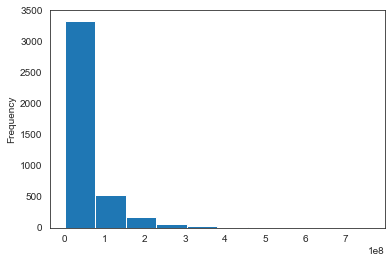

In [11]:
#Analisando o faturamento
sns.set_style("white")
imdb["gross"].plot(kind='hist')

O gráfico apresenta uma discrepância muito grande entre os valores, poucos filmes tem um faturamento tão alto. Quais são os filmes com maior faturamento?

In [12]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
26,Color,James Cameron,315.00,194.00,0.00,794.00,Kate Winslet,"29,000.00","658,672,302.00",Drama|Romance,Leonardo DiCaprio,TitanicÂ,793059,45223,Gloria Stuart,0.00,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,"2,528.00",English,USA,PG-13,"200,000,000.00","1,997.00","14,000.00",7.70,2.35,26000
29,Color,Colin Trevorrow,644.00,124.00,365.00,"1,000.00",Judy Greer,"3,000.00","652,177,271.00",Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic WorldÂ,418214,8458,Omar Sy,0.00,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,"1,290.00",English,USA,PG-13,"150,000,000.00","2,015.00","2,000.00",7.00,2.00,150000
794,Color,Joss Whedon,703.00,173.00,0.00,"19,000.00",Robert Downey Jr.,"26,000.00","623,279,547.00",Action|Adventure|Sci-Fi,Chris Hemsworth,The AvengersÂ,995415,87697,Scarlett Johansson,3.00,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,"1,722.00",English,USA,PG-13,"220,000,000.00","2,012.00","21,000.00",8.10,1.85,123000
17,Color,Joss Whedon,703.00,173.00,0.00,"19,000.00",Robert Downey Jr.,"26,000.00","623,279,547.00",Action|Adventure|Sci-Fi,Chris Hemsworth,The AvengersÂ,995415,87697,Scarlett Johansson,3.00,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,"1,722.00",English,USA,PG-13,"220,000,000.00","2,012.00","21,000.00",8.10,1.85,123000


In [13]:
#Será que filmes coloridos tem faturamento maior que filmes preto e branco?
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

C:\Python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [14]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,SpectreÂ,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000,1
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight RisesÂ,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John CarterÂ,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,1


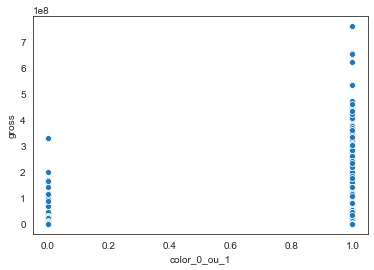

In [15]:
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")

Vimos que os filmes coloridos tem um faturamento maior (como esperado), mas existem alguns pontos bem altos entre os filmes em P&B, o que é interessante. 

In [16]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White   32,457,016.52
Color              49,026,187.22
Name: gross, dtype: float64

In [17]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White   7.23
Color              6.41
Name: imdb_score, dtype: float64

In [18]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White   7.40
Color              6.50
Name: imdb_score, dtype: float64

Apesar do faturamento ser maior para os filmes coloridos, a média e mediana dos filmes em P&B são maiores!

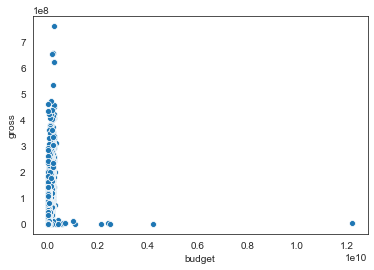

In [19]:
#Analisando as finanças dos filmes (faturamento e orçamento)

#remover as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")
sns.set_style("white")
sns.scatterplot(x="budget", y="gross", data = budget_gross)

In [20]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.00,110.00,584.00,74.00,Kang-ho Song,629.00,"2,201,412.00",Comedy|Drama|Horror|Sci-Fi,Doona Bae,The HostÂ,68883,1173,Ah-sung Ko,0.00,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.00,Korean,South Korea,R,"12,215,500,000.00","2,006.00",398.00,7.00,1.85,7000
3859,Color,Chan-wook Park,202.00,112.00,0.00,38.00,Yeong-ae Lee,717.00,"211,667.00",Crime|Drama,Min-sik Choi,Lady VengeanceÂ,53508,907,Hye-jeong Kang,0.00,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.00,Korean,South Korea,R,"4,200,000,000.00","2,005.00",126.00,7.70,2.35,4000
3005,Color,Lajos Koltai,73.00,134.00,45.00,0.00,PÃ©ter Fancsikai,9.00,"195,888.00",Drama|Romance|War,Marcell Nagy,FatelessÂ,5603,11,BÃ¡lint PÃ©ntek,0.00,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.00,Hungarian,Hungary,R,"2,500,000,000.00","2,005.00",2.00,7.10,2.35,607
2323,Color,Hayao Miyazaki,174.00,134.00,"6,000.00",745.00,Jada Pinkett Smith,893.00,"2,298,191.00",Adventure|Animation|Fantasy,Minnie Driver,Princess MononokeÂ,221552,2710,Billy Crudup,0.00,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.00,Japanese,Japan,PG-13,"2,400,000,000.00","1,997.00",851.00,8.40,1.85,11000
2334,Color,Katsuhiro Ãtomo,105.00,103.00,78.00,101.00,Robin Atkin Downes,488.00,"410,388.00",Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,SteamboyÂ,13727,991,Rosalind Ayres,1.00,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.00,Japanese,Japan,PG-13,"2,127,519,898.00","2,004.00",336.00,6.90,1.85,973


Ordenando os dados pelo budget percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [21]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [22]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John CarterÂ,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000
7,Color,Nathan Greno,324.00,100.00,15.00,284.00,Donna Murphy,799.00,"200,807,262.00",Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,TangledÂ,294810,2036,M.C. Gainey,1.00,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.00,English,USA,PG,"260,000,000.00","2,010.00",553.00,7.80,1.85,29000
6,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3Â,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0
3461,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3Â,383071,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0


In [23]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

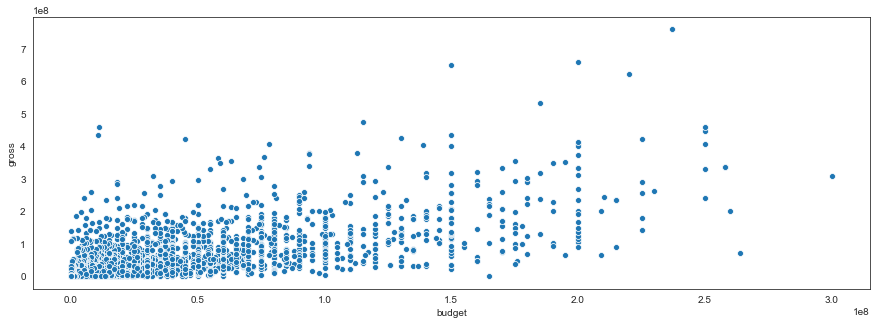

In [24]:
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

Aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.
Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como feature engineering.

C:\Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


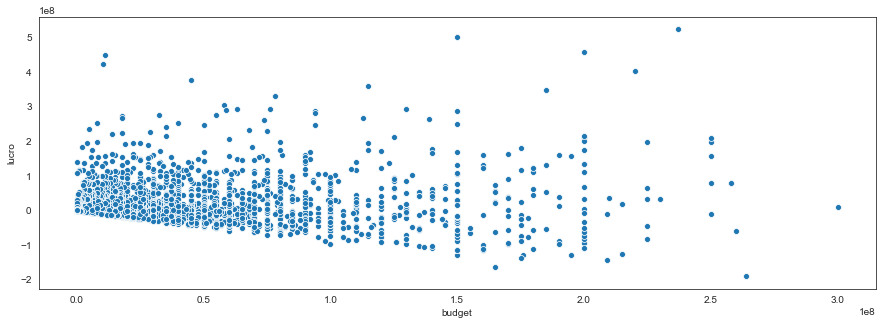

In [25]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade?

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

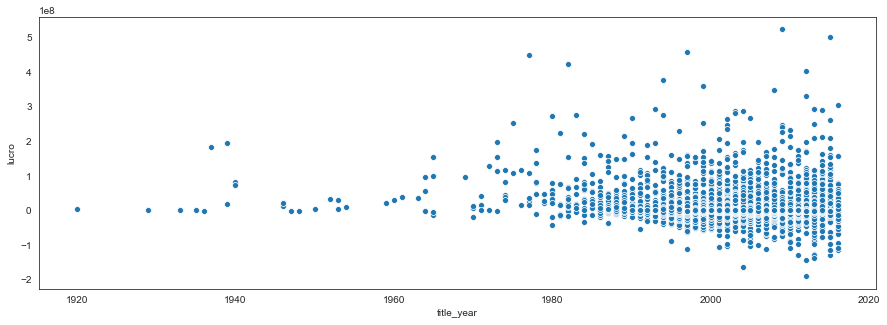

In [26]:
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["title_year", "lucro","gross","budget"]].dropna()

sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [27]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,"760,505,847.00",6.00
1,Gore Verbinski,"309,404,152.00",7.00
2,Christopher Nolan,"448,130,642.00",8.00
3,Andrew Stanton,"73,058,679.00",3.00
4,Sam Raimi,"336,530,303.00",11.00


In [28]:
gross_director

,director_name,dindin,filmes_irmaos
0,James Cameron,"760,505,847.00",6.00
1,Gore Verbinski,"309,404,152.00",7.00
2,Christopher Nolan,"448,130,642.00",8.00
3,Andrew Stanton,"73,058,679.00",3.00
4,Sam Raimi,"336,530,303.00",11.00
...,...,...,...
3768,Edward Burns,"4,584.00",4.00
3769,NaN,nan,nan
3770,Benjamin Roberds,nan,1.00
3771,Daniel Hsia,"10,443.00",1.00


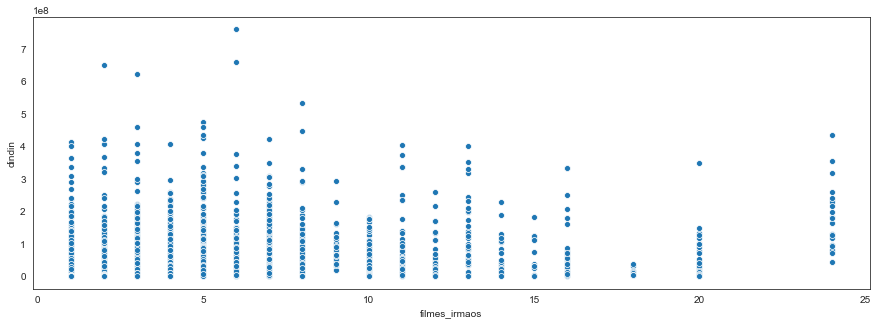

In [29]:
sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.
Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.
Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso

<Figure size 1440x360 with 0 Axes>

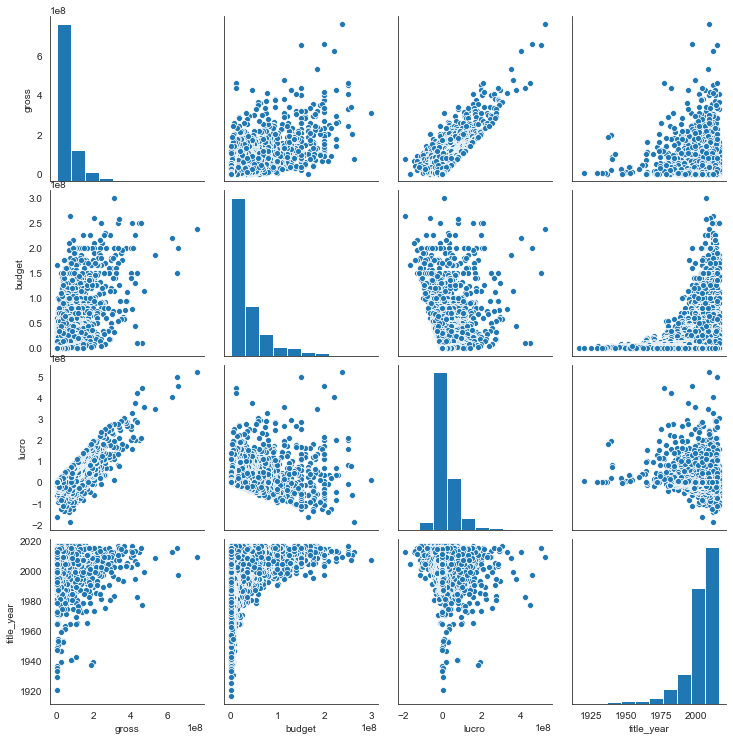

In [30]:
sns.set_style("white")
plt.figure(figsize=(20, 5))
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

In [31]:
#Correlação em números 
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.00,0.65,0.80,0.03
budget,0.65,1.00,0.05,0.23
lucro,0.80,0.05,1.00,-0.12
title_year,0.03,0.23,-0.12,1.00


### Desafio 1 - Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [32]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White   7.23
Color              6.41
Name: imdb_score, dtype: float64

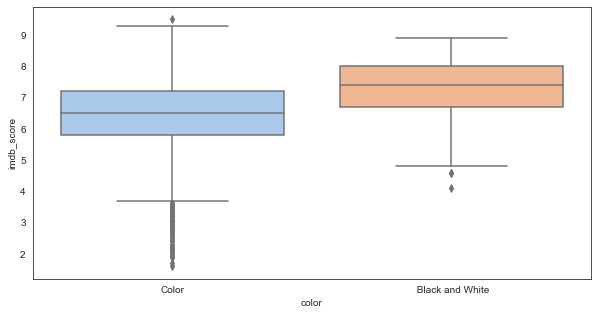

In [33]:
plt.figure(figsize=(10, 5))
sns.set_style("white")
sns.boxplot(data = color_or_bw, x ="color", y="imdb_score",palette='pastel')

### Desafio 2 - No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [34]:
budget_gross

,title_year,lucro,gross,budget
0,"2,009.00","523,505,847.00","760,505,847.00","237,000,000.00"
1,"2,007.00","9,404,152.00","309,404,152.00","300,000,000.00"
3,"2,012.00","198,130,642.00","448,130,642.00","250,000,000.00"
5,"2,012.00","-190,641,321.00","73,058,679.00","263,700,000.00"
6,"2,007.00","78,530,303.00","336,530,303.00","258,000,000.00"
...,...,...,...,...
5025,"1,972.00","170,483.00","180,483.00","10,000.00"
5033,"2,004.00","417,760.00","424,760.00","7,000.00"
5035,"1,992.00","2,033,920.00","2,040,920.00","7,000.00"
5037,"2,011.00","-4,416.00","4,584.00","9,000.00"


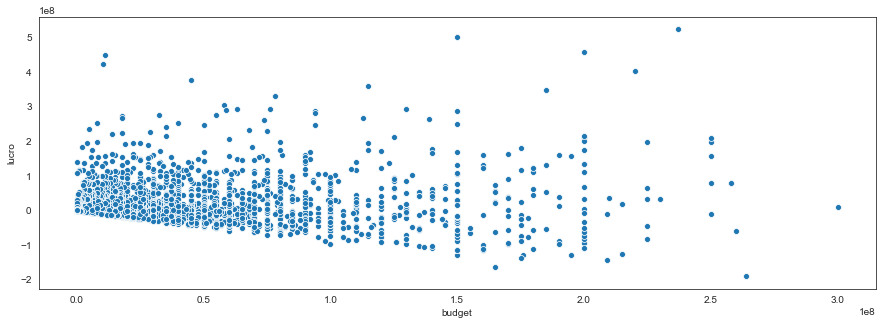

In [35]:
sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

#### Pelo gráfico identificamos que o budget é maior que 2.5, então usaremos esse valor na busca:

In [36]:
budget_outlier =  imdb_usa[['movie_title','director_name','budget', 'gross']].dropna().query('budget > 250000000')
budget_outlier.sort_values('gross', ascending=True)

,movie_title,director_name,budget,gross
5,John CarterÂ,Andrew Stanton,"263,700,000.00","73,058,679.00"
7,TangledÂ,Nathan Greno,"260,000,000.00","200,807,262.00"
1,Pirates of the Caribbean: At World's EndÂ,Gore Verbinski,"300,000,000.00","309,404,152.00"
6,Spider-Man 3Â,Sam Raimi,"258,000,000.00","336,530,303.00"
3461,Spider-Man 3Â,Sam Raimi,"258,000,000.00","336,530,303.00"


Encontramos 5 filmes com esse budget tão alto, e, dentre eles, o que teve o menor lucro foi o filme John Carter, do diretor Andrew Stanton.

### Desafio 3 - Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

Alterando o tipo da coluna de ano e excluindo as linhas sem valores nesse campo, já que a análise é toda baseada no ano:

In [37]:
imdb_usa_years = imdb_usa.dropna(subset=['title_year'])
imdb_usa_years = imdb_usa_years.astype({'title_year':'int'})

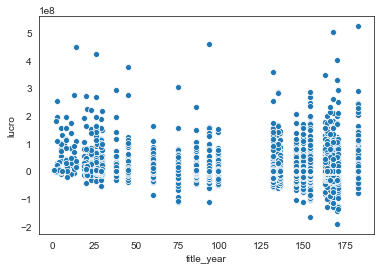

In [38]:
filmes_por_ano = imdb_usa_years["title_year"].value_counts()
lucro_ano = imdb_usa_years[["title_year", "lucro"]].set_index("title_year").join(filmes_por_ano, on="title_year")
lucro_ano.columns = ["lucro", "title_year"]
sns.scatterplot(x="title_year", y="lucro", data = lucro_ano)

In [39]:
imdb_usa_years[{"title_year","budget","gross","movie_title","lucro"}].sort_values(by='gross', ascending = False).head(10)

,lucro,budget,title_year,gross,movie_title
0,"523,505,847.00","237,000,000.00",2009,"760,505,847.00",AvatarÂ
26,"458,672,302.00","200,000,000.00",1997,"658,672,302.00",TitanicÂ
29,"502,177,271.00","150,000,000.00",2015,"652,177,271.00",Jurassic WorldÂ
17,"403,279,547.00","220,000,000.00",2012,"623,279,547.00",The AvengersÂ
66,"348,316,061.00","185,000,000.00",2008,"533,316,061.00",The Dark KnightÂ
240,"359,544,677.00","115,000,000.00",1999,"474,544,677.00",Star Wars: Episode I - The Phantom MenaceÂ
3024,"449,935,665.00","11,000,000.00",1977,"460,935,665.00",Star Wars: Episode IV - A New HopeÂ
8,"208,991,599.00","250,000,000.00",2015,"458,991,599.00",Avengers: Age of UltronÂ
3,"198,130,642.00","250,000,000.00",2012,"448,130,642.00",The Dark Knight RisesÂ
582,"286,471,036.00","150,000,000.00",2004,"436,471,036.00",Shrek 2Â


Para ter uma conclusão melhor, o ideal seria ter um dataset de lucro por ano para os filmes, pois poderíamos identificar quanto tempo o filme permanece lucrando após o lançamento ou se todo o valor significante está no primeiro ou segundo ano apenas. Também seria interessante saber se esse lucro se refere a apenas a bilheteria ou se produtos oficiais e afins etc também entram nesse valor.

Apenas com as informações que temos, não podemos dizer que os filmes mais recentes precisam de mais tempo para recuperar o investimento, pois no TOP 10 Gross, temos 4 filmes com menos de 5 anos de lançamento e o mais rentável de todos os anos analisados tem menos de 10 anos. 

O mais antigo é o Star Wars, de 1977, que possui uma franquia de grande sucesso até os dias atuais e que marcou uma época, aparecendo também com outro episódio no ano de 1999. E para finalizar, temos dois filmes que aparecem juntamente com suas continuações (The Avengers e The Dark Knight).

### Desafio 4 - Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

A Segunda Guerra ocorreu no período de 1939 a 1945. Vamos pegar todos os filmes anteriores a 1945 para analisar:

In [40]:
filmes_periodo_guerra = imdb_usa.dropna(subset=['title_year'])
filmes_periodo_guerra = filmes_periodo_guerra.astype({'title_year':'int'})
filmes_periodo_guerra = filmes_periodo_guerra.query("title_year <= 1945")

In [41]:
filmes_periodo_guerra[{"movie_title","title_year","budget","gross","genres"}].sort_values(by='gross', ascending = False)

,budget,title_year,gross,movie_title,genres
3970,"3,977,000.00",1939,"198,655,278.00",Gone with the WindÂ,Drama|History|Romance|War
4449,"2,000,000.00",1937,"184,925,485.00",Snow White and the Seven DwarfsÂ,Animation|Family|Fantasy|Musical
4647,nan,1942,"102,797,150.00",BambiÂ,Animation|Drama|Family
1143,"2,600,000.00",1940,"84,300,000.00",PinocchioÂ,Animation|Family|Fantasy|Musical
4225,"2,280,000.00",1940,"76,400,000.00",FantasiaÂ,Animation|Family|Fantasy|Music
4157,"2,800,000.00",1939,"22,202,612.00",The Wizard of OzÂ,Adventure|Family|Fantasy|Musical
4706,"609,000.00",1935,"3,000,000.00",Top HatÂ,Comedy|Musical|Romance
4958,"100,000.00",1920,"3,000,000.00",Over the Hill to the PoorhouseÂ,Crime|Drama
4812,"379,000.00",1929,"2,808,000.00",The Broadway MelodyÂ,Musical|Romance
4786,"439,000.00",1933,"2,300,000.00",42nd StreetÂ,Comedy|Musical|Romance


Como muitos dos filmes não possuem o valor de lucro, vamos excluir os filmes em que não temos essa varíavel:

In [ ]:
filmes_periodo_guerra = filmes_periodo_guerra[{"movie_title","title_year","budget","gross","genres"}].sort_values(by='gross', ascending = False).dropna(subset=['gross'])

In [65]:
filmes_periodo_guerra

,movie_title,title_year,genres,budget,gross
3970,Gone with the WindÂ,1939,Drama|History|Romance|War,"3,977,000.00","198,655,278.00"
4449,Snow White and the Seven DwarfsÂ,1937,Animation|Family|Fantasy|Musical,"2,000,000.00","184,925,485.00"
4647,BambiÂ,1942,Animation|Drama|Family,nan,"102,797,150.00"
1143,PinocchioÂ,1940,Animation|Family|Fantasy|Musical,"2,600,000.00","84,300,000.00"
4225,FantasiaÂ,1940,Animation|Family|Fantasy|Music,"2,280,000.00","76,400,000.00"
4157,The Wizard of OzÂ,1939,Adventure|Family|Fantasy|Musical,"2,800,000.00","22,202,612.00"
4706,Top HatÂ,1935,Comedy|Musical|Romance,"609,000.00","3,000,000.00"
4958,Over the Hill to the PoorhouseÂ,1920,Crime|Drama,"100,000.00","3,000,000.00"
4812,The Broadway MelodyÂ,1929,Musical|Romance,"379,000.00","2,808,000.00"
4786,42nd StreetÂ,1933,Comedy|Musical|Romance,"439,000.00","2,300,000.00"


In [1]:
chart = sns.catplot(x="movie_title", y="gross", kind = "bar", data=filmes_periodo_guerra,ci=None,palette='pastel',edgecolor='.7',height=5.5,aspect=2)
chart.set_xticklabels(rotation=40)
plt.title('Lucro dos filmes até o ano de 1945',fontsize=16)
plt.show()

NameError: name 'sns' is not defined

Muitos filmes da Disney faziam sucesso e tiveram lucros altos no período, além de musicais e filmes românticos. Mas o primeiro lugar, veja só... é também um filme de guerra!

### Desafio 5 - No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornetar nas redes sociais kkkkk)

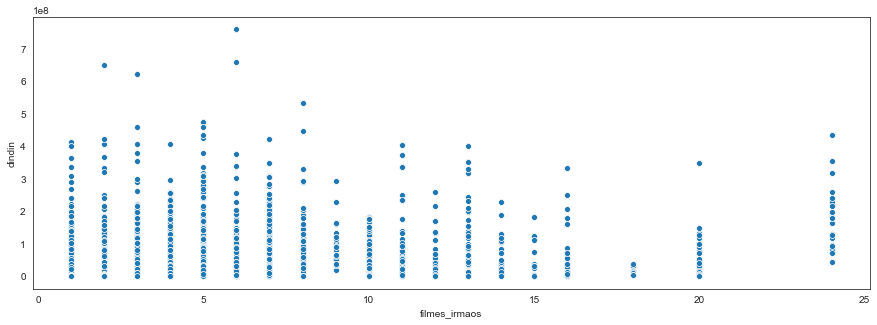

In [67]:
sns.set_style("white")
plt.figure(figsize=(15, 5))
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Pelo gráfico, podemos ver que esses pontos ficam exatamente na posição 18. Vamos então filtrar os que estão em 18:

In [68]:
gross_director_estranho = gross_director.query("filmes_irmaos == 18")

In [69]:
gross_director_estranho

,director_name,dindin,filmes_irmaos
1538,Woody Allen,"7,496,522.00",18.00
1737,Woody Allen,"16,684,352.00",18.00
1861,Woody Allen,"13,383,737.00",18.00
1869,Woody Allen,"10,569,071.00",18.00
1872,Woody Allen,"9,714,482.00",18.00
1960,Woody Allen,"33,404,871.00",18.00
1975,Woody Allen,"17,071,230.00",18.00
1993,Woody Allen,"3,203,044.00",18.00
2070,Woody Allen,"14,792,779.00",18.00
2078,Woody Allen,"4,839,383.00",18.00


#### Paulo, acertou miseravi! >D

### Desafio 6 - Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000)

In [72]:
filmes_pos_2000 = imdb_usa.query("title_year > 1999")

In [73]:
filmes_pos_2000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,"523,505,847.00"
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,"9,404,152.00"
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,The Dark Knight RisesÂ,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,"198,130,642.00"
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,"73,058,679.00",Action|Adventure|Sci-Fi,Daryl Sabara,John CarterÂ,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,"263,700,000.00","2,012.00",632.00,6.60,2.35,24000,"-190,641,321.00"
6,Color,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,Spider-Man 3Â,383056,46055,Kirsten Dunst,0.00,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,"78,530,303.00"


In [74]:
corr = filmes_pos_2000.corr()

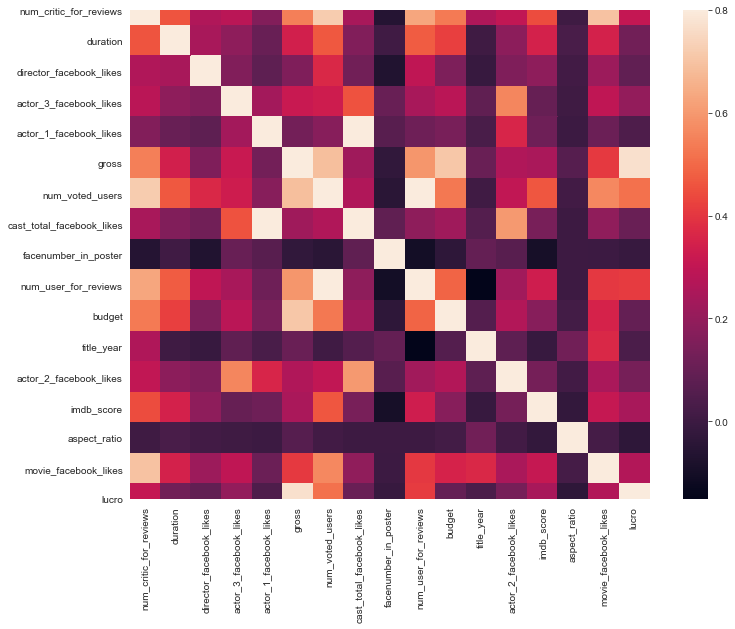

In [75]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

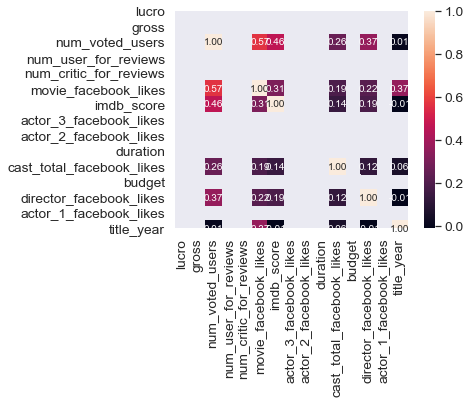

In [81]:
# correlation matrix
k =15 #number of variables for heatmap
cols = corr.nlargest(k, 'lucro')['lucro'].index
cm = np.corrcoef(filmes_pos_2000[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Desafio 9 - Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.